# How are things collimated in the Lepton Jets?

#### m_X, DP mass, displacement, all seem to have some impact, let's dig deeper

## Imports

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../')) # This is definitely a bit hacky, but I don't mind
from sidm.tools import ffschema, sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
importlib.reload(scaleout)
#plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
import hist
from sidm.tools import histogram as h
importlib.reload(h)

<module 'sidm.tools.histogram' from '/home/cms-jovyan/SiDM/SIDM/sidm/studies/../../sidm/tools/histogram.py'>

### Collect sample names from yaml files

In [2]:
all_sample_names = utilities.load_yaml("../configs/ntuple_locations.yaml")

In [3]:
all_sample_names.keys()

dict_keys(['ffntuple_v4', 'ffntuple_v2'])

In [4]:
for key in all_sample_names["ffntuple_v4"]["samples"].keys():
    if "2Mu2E" in key: print(key)

2Mu2E_1000GeV_0p25GeV_0p002mm
2Mu2E_1000GeV_0p25GeV_0p02mm
2Mu2E_1000GeV_0p25GeV_0p2mm
2Mu2E_1000GeV_0p25GeV_1mm
2Mu2E_1000GeV_0p25GeV_2mm
2Mu2E_1000GeV_1p2GeV_0p0096mm
2Mu2E_1000GeV_1p2GeV_0p096mm
2Mu2E_1000GeV_1p2GeV_0p96mm
2Mu2E_1000GeV_1p2GeV_4p8mm
2Mu2E_1000GeV_1p2GeV_9p6mm
2Mu2E_1000GeV_5GeV_0p04mm
2Mu2E_1000GeV_5GeV_0p4mm
2Mu2E_1000GeV_5GeV_20mm
2Mu2E_1000GeV_5GeV_40mm
2Mu2E_1000GeV_5GeV_4mm
2Mu2E_100GeV_0p25GeV_0p02mm
2Mu2E_100GeV_0p25GeV_0p2mm
2Mu2E_100GeV_0p25GeV_10mm
2Mu2E_100GeV_0p25GeV_20mm
2Mu2E_100GeV_0p25GeV_2mm
2Mu2E_100GeV_1p2GeV_0p096mm
2Mu2E_100GeV_1p2GeV_0p96mm
2Mu2E_100GeV_1p2GeV_48mm
2Mu2E_100GeV_1p2GeV_96mm
2Mu2E_100GeV_1p2GeV_9p6mm
2Mu2E_100GeV_5GeV_0p4mm
2Mu2E_100GeV_5GeV_200mm
2Mu2E_100GeV_5GeV_400mm
2Mu2E_100GeV_5GeV_40mm
2Mu2E_100GeV_5GeV_4mm
2Mu2E_150GeV_0p25GeV_0p013mm
2Mu2E_150GeV_0p25GeV_0p13mm
2Mu2E_150GeV_0p25GeV_13mm
2Mu2E_150GeV_0p25GeV_1p3mm
2Mu2E_150GeV_0p25GeV_6p7mm
2Mu2E_150GeV_1p2GeV_0p064mm
2Mu2E_150GeV_1p2GeV_0p64mm
2Mu2E_150GeV_1p2GeV_32mm
2

In [5]:
samples = list(all_sample_names["ffntuple_v4"]["samples"].keys())

### Execution (Dask or Otherwise)

if error seen here: With the DaskExecutor, a different version of the histogram list seems to be called upon.
Then: make sure pip install dependency is upgrading the sidm package, and that the git remote has the latest hists you want.
if error seen here: Dask error
Then: shutdown and start a new Dask session from the coffea casa menu on the left, and maybe try restarting the kernel and try again.

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")

/opt/conda/lib/python3.8/site-packages/distributed/client.py:1288: VersionMismatchWarning: Mismatched versions found

+---------+----------------+----------------+----------------+
| Package | client         | scheduler      | workers        |
+---------+----------------+----------------+----------------+
| python  | 3.8.16.final.0 | 3.8.16.final.0 | 3.8.15.final.0 |
+---------+----------------+----------------+----------------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


Comment out the DaskExecutor line and swap with FuturesExecutor line if you wish to run Dask free. And you can skip this ^

In [6]:
# You can use the samples below if you're developing new hists and what to test those out. 
# Dask only works if the remote repo already has thew new hists

# samples = [
#     "2Mu2E_100GeV_1p2GeV_0p096mm",
#     "2Mu2E_100GeV_1p2GeV_9p6mm",
#     "2Mu2E_100GeV_5GeV_4mm",
#     "2Mu2E_150GeV_5GeV_2p7mm",
#     "2Mu2E_200GeV_5GeV_2mm",
#     "2Mu2E_500GeV_5GeV_0p8mm",
#     "2Mu2E_800GeV_5GeV_0p5mm",
#     "2Mu2E_1000GeV_5GeV_0p4mm"
# ]
samples = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_0p25GeV_0p2mm",
    "2Mu2E_100GeV_0p25GeV_2mm",
    "2Mu2E_100GeV_0p25GeV_10mm",
    "2Mu2E_100GeV_0p25GeV_20mm",
    "2Mu2E_100GeV_1p2GeV_0p096mm",
    "2Mu2E_100GeV_1p2GeV_0p96mm",
    "2Mu2E_100GeV_1p2GeV_48mm",
    "2Mu2E_100GeV_1p2GeV_96mm",
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_100GeV_5GeV_0p4mm",
    "2Mu2E_100GeV_5GeV_4mm",
    "2Mu2E_100GeV_5GeV_40mm",
    "2Mu2E_100GeV_5GeV_200mm",
    "2Mu2E_100GeV_5GeV_400mm",
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
    "2Mu2E_1000GeV_0p25GeV_0p02mm",
    "2Mu2E_1000GeV_0p25GeV_0p2mm",
    "2Mu2E_1000GeV_0p25GeV_1mm",
    "2Mu2E_1000GeV_0p25GeV_2mm",
    "2Mu2E_1000GeV_5GeV_0p04mm",
    "2Mu2E_1000GeV_5GeV_0p4mm",
    "2Mu2E_1000GeV_5GeV_20mm",
    "2Mu2E_1000GeV_5GeV_40mm",
    "2Mu2E_1000GeV_5GeV_4mm"
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    executor=processor.FuturesExecutor(),
    # executor=processor.DaskExecutor(client=client),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e_matchedLj",
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

In [7]:
output['out']['2Mu2E_100GeV_5GeV_4mm']['hists'].keys()

dict_keys(['pv_n', 'pv_ndof', 'pv_z', 'pv_rho', 'electron_n', 'electron_pt', 'electron_eta_phi', 'photon_n', 'photon_pt', 'photon_eta_phi', 'muon_n', 'muon_pt', 'muon_eta_phi', 'dsaMuon_n', 'dsaMuon_pt', 'dsaMuon_eta_phi', 'lj_n', 'lj_pt', 'egm_lj_pt', 'mu_lj_pt', 'lj0_pt', 'lj1_pt', 'lj0_e', 'lj1_e', 'lj0_dRSpread', 'lj1_dRSpread', 'lj_eta_phi', 'lj_electronN', 'lj_photonN', 'lj_electronPhotonN', 'lj_muonN', 'ljsource_n', 'ljsource_pt', 'ljsource_eta_phi', 'ljsource_charge', 'ljsource_type', 'electron_lj_dR', 'electron_lj_dR_lowRange', 'photon_lj_dR', 'photon_lj_dR_lowRange', 'photon_lj_dR_reallyLowRange', 'muon_lj_dR', 'muon_lj_dR_lowRange', 'dsaMuon_lj_dR', 'dsaMuon_lj_dR_lowRange', 'lj_lj_absdphi', 'lj_lj_invmass', 'lj_lj_invmass_lowRange', 'lj_pfIsolation05', 'lj0_pfIsolation05', 'lj1_pfIsolation05', 'lj_pfIsolationPtNoPU05', 'lj_pfIsolationPt05', 'lj_pfIsolation07', 'lj_pfIsolationPtNoPU07', 'lj_pfIsolationPt07', 'lj_pfiso', 'abcd_lj_lj_dphi_vs_lj0_pfIsolationPt05', 'gen_abspid',

### LJ Inv Mass

In [4]:
samples_toPlot = [
    "2Mu2E_100GeV_5GeV_0p4mm",
    "2Mu2E_150GeV_5GeV_0p27mm",
    "2Mu2E_200GeV_5GeV_0p2mm",
    "2Mu2E_500GeV_5GeV_0p8mm",
    "2Mu2E_800GeV_5GeV_0p5mm",
    "2Mu2E_1000GeV_5GeV_0p4mm"
]

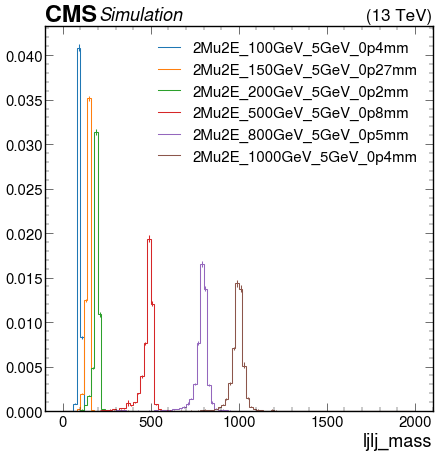

In [66]:
utilities.plot([output['out'][f"{name}"]['hists']["lj_lj_invmass"]["2mu2e_matchedLj",:] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot);

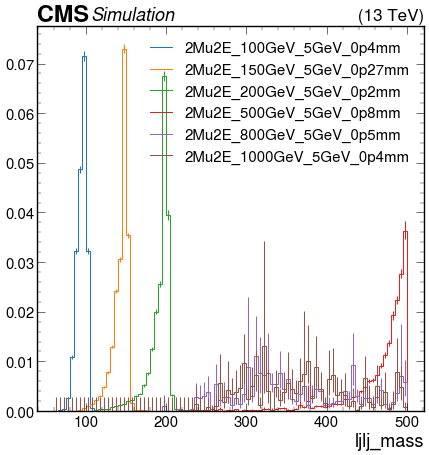

In [67]:
utilities.plot([output['out'][f"{name}"]['hists']["lj_lj_invmass_lowRange"]["2mu2e_matchedLj",60j:] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot);

Would the above plots peak for background once cuts on dphi and isolation are imposed? Where would they peak?

Are these axes really independant for background afterall? Maybe a closure plane plot would help?

Finally, this is a fantastic feature. Perhaps we should consider using it as a discriminator?
We should compare this with background to see how much this stands out

### LJ Inv Mass and dRSpread

In [4]:
samples_toPlot = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_0p25GeV_0p2mm",
    "2Mu2E_100GeV_0p25GeV_2mm",
    "2Mu2E_100GeV_0p25GeV_10mm",
    "2Mu2E_100GeV_0p25GeV_20mm",
    "2Mu2E_100GeV_5GeV_0p4mm",
    "2Mu2E_100GeV_5GeV_4mm",
    "2Mu2E_100GeV_5GeV_40mm",
    "2Mu2E_100GeV_5GeV_200mm",
    "2Mu2E_100GeV_5GeV_400mm",
]

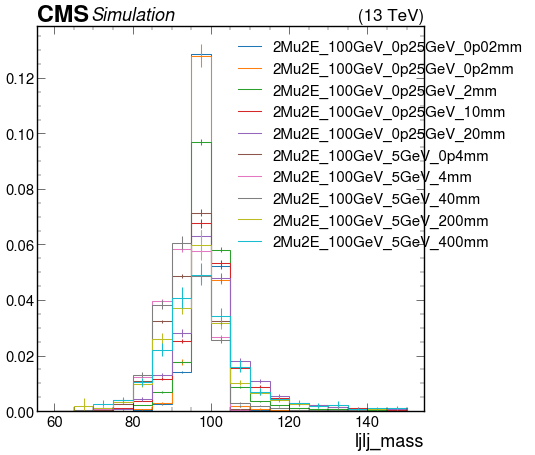

In [81]:
utilities.plot([output['out'][f"{name}"]['hists']["lj_lj_invmass_lowRange"]["2mu2e_matchedLj",60j:150j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(.5,.4));

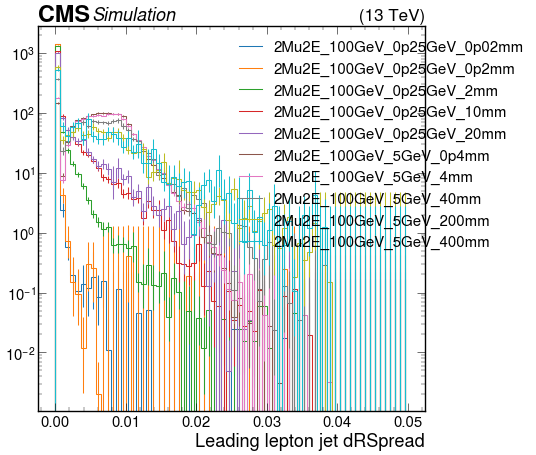

In [6]:
utilities.plot([output['out'][f"{name}"]['hists']['lj0_dRSpread']["2mu2e_matchedLj",:0.05j:5j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(0.5,0.4));
plt.yscale("log");

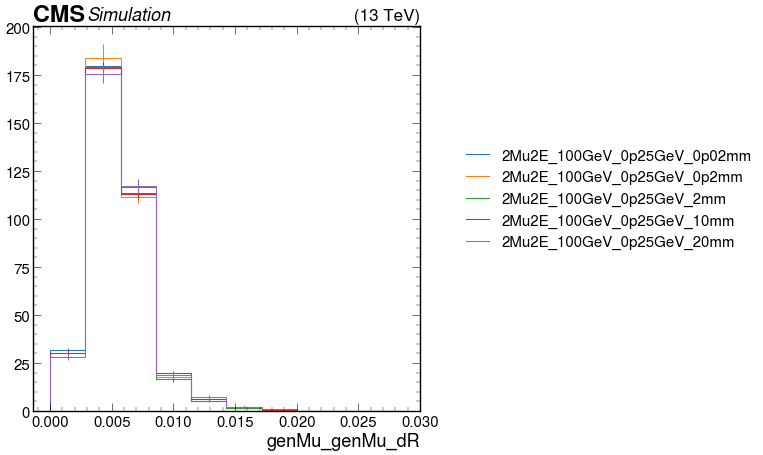

In [8]:
samples_toPlot = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_0p25GeV_0p2mm",
    "2Mu2E_100GeV_0p25GeV_2mm",
    "2Mu2E_100GeV_0p25GeV_10mm",
    "2Mu2E_100GeV_0p25GeV_20mm",
]
utilities.plot([output['out'][f"{name}"]['hists']['genMu_genMu_dR']["2mu2e_matchedLj",:0.03j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));
# plt.yscale("log");

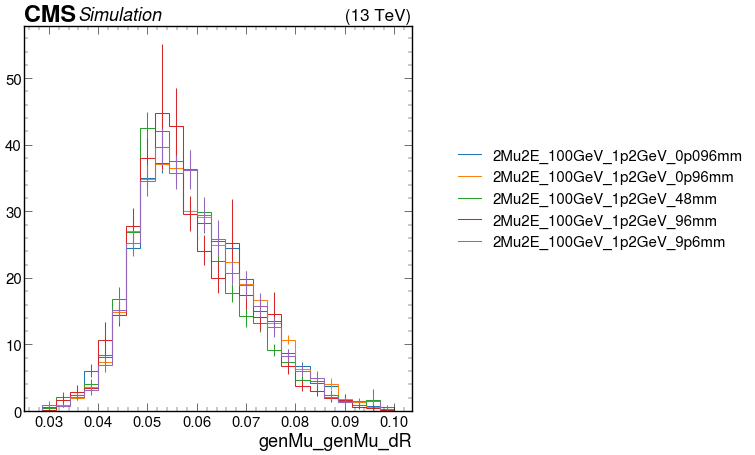

In [19]:
samples_toPlot = [
    "2Mu2E_100GeV_1p2GeV_0p096mm",
    "2Mu2E_100GeV_1p2GeV_0p96mm",
    "2Mu2E_100GeV_1p2GeV_48mm",
    "2Mu2E_100GeV_1p2GeV_96mm",
    "2Mu2E_100GeV_1p2GeV_9p6mm",
]
utilities.plot([output['out'][f"{name}"]['hists']['genMu_genMu_dR']["2mu2e_matchedLj",0.03j:.1j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));
# plt.yscale("log");

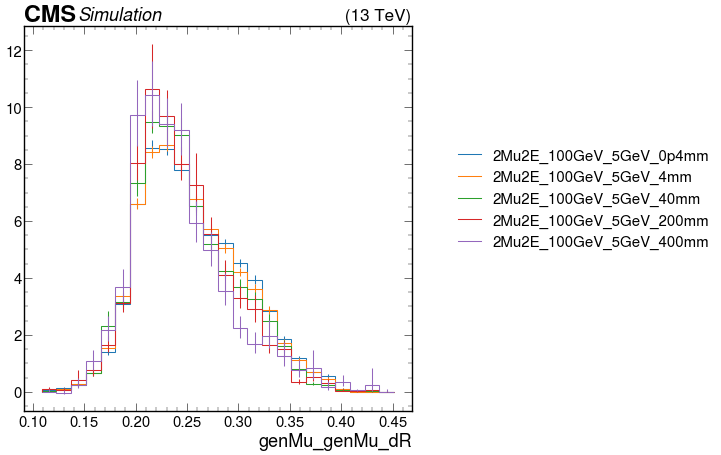

In [12]:
samples_toPlot = [
    "2Mu2E_100GeV_5GeV_0p4mm",
    "2Mu2E_100GeV_5GeV_4mm",
    "2Mu2E_100GeV_5GeV_40mm",
    "2Mu2E_100GeV_5GeV_200mm",
    "2Mu2E_100GeV_5GeV_400mm",
]
utilities.plot([output['out'][f"{name}"]['hists']['genMu_genMu_dR']["2mu2e_matchedLj",.11j:.46j:5j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));
# plt.yscale("log");

In [8]:
samples_toPlot = [
"2Mu2E_1000GeV_0p25GeV_0p002mm",
"2Mu2E_1000GeV_0p25GeV_0p02mm",
"2Mu2E_1000GeV_0p25GeV_0p2mm",
"2Mu2E_1000GeV_0p25GeV_1mm",
"2Mu2E_1000GeV_0p25GeV_2mm",
"2Mu2E_1000GeV_5GeV_0p04mm",
"2Mu2E_1000GeV_5GeV_0p4mm",
"2Mu2E_1000GeV_5GeV_20mm",
"2Mu2E_1000GeV_5GeV_40mm",
"2Mu2E_1000GeV_5GeV_4mm"
]

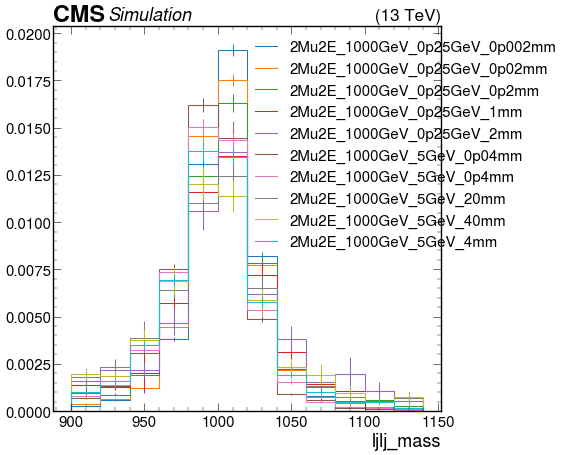

In [86]:
utilities.plot([output['out'][f"{name}"]['hists']["lj_lj_invmass"]["2mu2e_matchedLj",900j:1150j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(.5,.4));

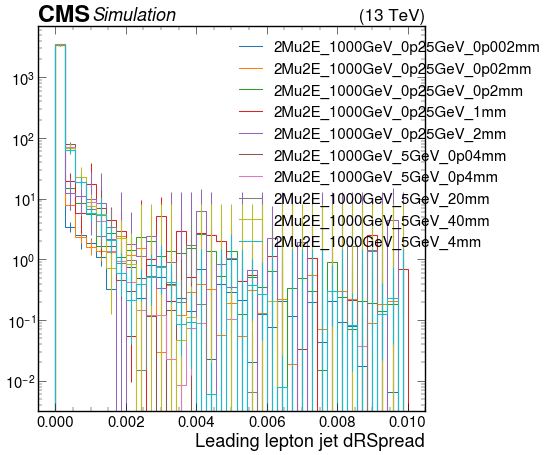

In [19]:
utilities.plot([output['out'][f"{name}"]['hists']['lj0_dRSpread']["2mu2e_matchedLj",:.01j:2j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(0.5,0.4));
plt.yscale("log");

Some points to note here:

1. As m_X gets larger, the whole system gets collimated and that is reflected in dRSpread
2. As DP mass gets larger for the same m_X, then jets get wider (less collimated), and this may explain the poorer resolution in ljlj_invmass
3. As displacement grows for given DP mass and m_X, then jets get wider still (as suggested by dRSpread), this may also explain poorer resoltuion in ljlj_invmass plots

For effect 3, it could also be that more displaced --> worse reco --> smeared out dR distribution